<a href="https://colab.research.google.com/github/mirzaaa101/AI-Lab-Resource/blob/main/interview_task_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection in X-ray Images: Interview Task

Welcome to this technical interview task focusing on object detection in X-ray images. This notebook is designed to assess your skills in data analysis, model development, and result interpretation in the context of baggage X-ray imaging. The task should take around 3 hours.

## Background

You are interested in evaluating the quality of synthetic X-ray images for baggage screening. You wanted to use Fréchet Inception Distance(FID) to measure the difference between real data and synthetic data. However, you realise that the feature extractor used to calculate is inception-v3, a classifier model trained on solely natural images. You are worried that the domain difference between X-ray data and natural images will cause the results to be unreliable. Therefore, you have decided to **train an object detector on X-ray data and replace inception-v3 with the backbone of the object detector you trained, for Fréchet distance calculation**.  

## Task Description

You will be working with a dataset of X-ray images and tasked with developing an object detection model using Faster R-CNN with a ResNet-18 backbone and then using the backbone for calculating Fréchet distance. You are highly recommended to use PyTorch, but you can use other frameworks if you prefer. With Google Colab you can connect to a free T4, which would be sufficient for the model training here. The interview consists of 5 main questions with a total of 100 marks, each focusing on a different aspect of the machine learning pipeline:

1. Data Analysis: Explore and analyze the provided X-ray image dataset.
2. Data Preparation: Preprocess and prepare the data for model training.
3. Model Building and Fine-tuning: Implement and train the Faster R-CNN model.
4. Result Analysis: Evaluate the model's performance and interpret the results.
5. FID Calculation: Calculate the Fréchet distance to assess image quality with the backbone you have trained, similar to how Fréchet inception distance(FID) is calculated.

Please complete each section to the best of your ability. Feel free to add explanations, visualizations, or additional analyses as you see fit. Good luck!

*Note: If you are using Google Colab free T4 I suggest you start with a CPU to do data processing and preparation. Save the processed data on your Google Drive. Only connect to T4 after you reach Question 3 and mount the saved data to the T4 machine. This is because Google has a short time limit for the T4 runtime.*

## Question 1: Data Analysis (20 Marks, Suggested timing: 30 mins)

The dataset we are using is [DvXray](https://github.com/Mbwslib/DvXray?tab=readme-ov-file), please download the **positive** samples they provided on the github page and do the following tasks:

1. Keep images with indexes less than 500 and delete the rest. You should be left with 500 pairs of X-ray images and their corresponding json labels.
2. Analyze the distribution of object classes.
3. Visualize sample images with their annotations

In [ ]:
from google.colab import drive

!ls /content/drive
!rm -r /content/drive/*
drive.mount('/content/drive')

MyDrive
Mounted at /content/drive


**Take 500 Samples**

In [ ]:
import os
import zipfile
import shutil

ROOT = "/content/drive/MyDrive/Colab Notebooks"
original_data_path = 'DvXray_Positive_Samples'
filtered_data_path = 'Filtered_Positive_Samples'

original_zip_file = f"{ROOT}/{original_data_path}/DvXray_Positive_Samples.zip"
extracted_data_path = f"{ROOT}/{original_data_path}/extracted"
filtered_data = f"{ROOT}/{filtered_data_path}"

os.makedirs(extracted_data_path, exist_ok=True)
os.makedirs(filtered_data, exist_ok=True)

In [ ]:
with zipfile.ZipFile(original_zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_data_path)

extracted_files = os.listdir(f"{extracted_data_path}/DvXray_Positive_Samples")
print("Extracted files:")
print(extracted_files)

Extracted files:
['P00000.json', 'P00000_OL.png', 'P00000_SD.png', 'P00001.json', 'P00001_OL.png', 'P00001_SD.png', 'P00002.json', 'P00002_OL.png', 'P00002_SD.png', 'P00003.json', 'P00003_OL.png', 'P00003_SD.png', 'P00004.json', 'P00004_OL.png', 'P00004_SD.png', 'P00005.json', 'P00005_OL.png', 'P00005_SD.png', 'P00006.json', 'P00006_OL.png', 'P00006_SD.png', 'P00007.json', 'P00007_OL.png', 'P00007_SD.png', 'P00008.json', 'P00008_OL.png', 'P00008_SD.png', 'P00009.json', 'P00009_OL.png', 'P00009_SD.png', 'P00010.json', 'P00010_OL.png', 'P00010_SD.png', 'P00011.json', 'P00011_OL.png', 'P00011_SD.png', 'P00012.json', 'P00012_OL.png', 'P00012_SD.png', 'P00013.json', 'P00013_OL.png', 'P00013_SD.png', 'P00014.json', 'P00014_OL.png', 'P00014_SD.png', 'P00015.json', 'P00015_OL.png', 'P00015_SD.png', 'P00016.json', 'P00016_OL.png', 'P00016_SD.png', 'P00017.json', 'P00017_OL.png', 'P00017_SD.png', 'P00018.json', 'P00018_OL.png', 'P00018_SD.png', 'P00019.json', 'P00019_OL.png', 'P00019_SD.png', 'P

In [ ]:
extracted_indices = set()

for index in range(500):
    index_str = f"P{'%05d' % index}"
    files_to_move = [
        f"{index_str}_OL.png",
        f"{index_str}_SD.png",
        f"{index_str}.json"
    ]

    for file_name in files_to_move:
        source_path = os.path.join(f"{extracted_data_path}/DvXray_Positive_Samples", file_name)
        if os.path.exists(source_path):
            shutil.copy(source_path, filtered_data)
            extracted_indices.add(index_str)

print(f"Total unique samples extracted: {len(extracted_indices)}")

Total unique samples extracted: 500


In [ ]:
filtered_data_path = f"{filtered_data}"

ol_count = 0
sd_count = 0
json_count = 0

for file_name in os.listdir(filtered_data_path):
    if file_name.endswith('_OL.png'):
        ol_count += 1
    elif file_name.endswith('_SD.png'):
        sd_count += 1
    elif file_name.endswith('.json'):
        json_count += 1

print(f"Total _OL.png files: {ol_count}")
print(f"Total _SD.png files: {sd_count}")
print(f"Total .json files: {json_count}")

Total _OL.png files: 500
Total _SD.png files: 500
Total .json files: 500


**Distribution of object classes**

In [ ]:
import json

filtered_data_path = f"{filtered_data}"
class_counts = {}

for file_name in os.listdir(filtered_data_path):
    if file_name.endswith('.json'):
        json_path = os.path.join(filtered_data_path, file_name)

        with open(json_path, 'r') as json_file:
            try:
                data = json.load(json_file)
                objects = data.get('objects', [])
                if not objects:
                    print(f"Warning: No objects found in {file_name}.")
                    continue

                for obj in objects:
                    class_label = obj.get('label')

                    if class_label:
                        class_counts[class_label] = class_counts.get(class_label, 0) + 1
                    else:
                        print(f"Warning: 'label' key missing in {file_name}, object: {obj}")

            except json.JSONDecodeError:
                print(f"Error: Failed to parse JSON file {file_name}")

print("Class Distribution:")
for class_label, count in class_counts.items():
    print(f"{class_label}: {count}")

Class Distribution:
Pressure_vessel: 1
Wrench: 1
Knife: 140
Pliers: 1
Battery: 254
Fireworks: 83
Gun: 20


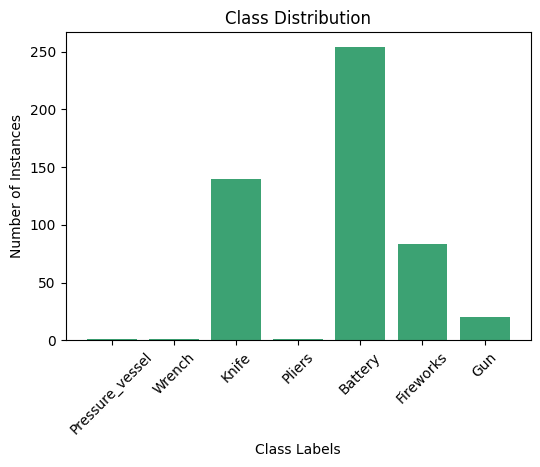

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='#3CA273')
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45)
plt.show()

**Visualize sample images with their annotations**

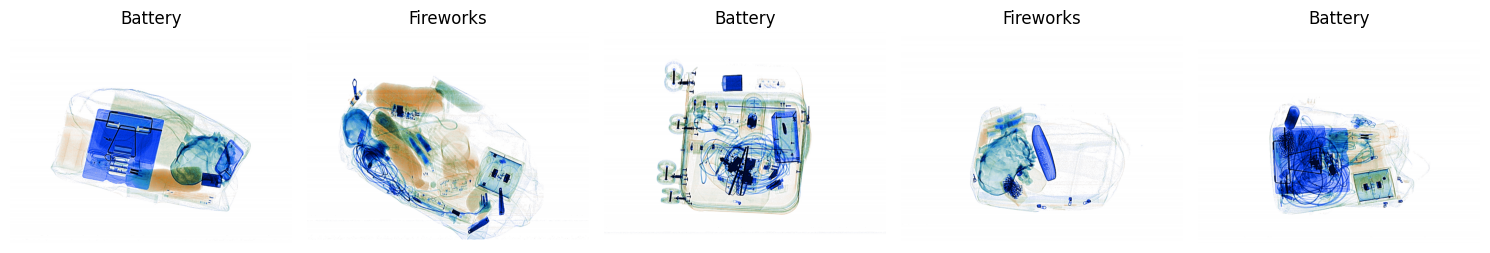

In [ ]:
import random
from PIL import Image

filtered_data_path = f"{filtered_data}"

random_indices = random.sample(range(0, 500), 5)

sample_images = []
sample_labels = []

for index in random_indices:
    image_filename = f"P{index:05d}_OL.png"
    label_filename = f"P{index:05d}.json"

    if image_filename in os.listdir(filtered_data_path) and label_filename in os.listdir(filtered_data_path):
        image_path = os.path.join(filtered_data_path, image_filename)
        image = Image.open(image_path)
        sample_images.append(image)

        with open(os.path.join(filtered_data_path, label_filename), 'r') as f:
            label_data = json.load(f)
            sample_labels.append(label_data['objects'][0]['label'])

plt.figure(figsize=(15, 10))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i])
    plt.title(sample_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image_list = []
label_list = []

filtered_data_path = f"{filtered_data}"

for filename in os.listdir(filtered_data_path):
    if filename.endswith('_OL.png'):
        image_path = os.path.join(filtered_data_path, filename)
        image_list.append(image_path)
    elif filename.endswith('.json'):
        label_path = os.path.join(filtered_data_path, filename)
        label_list.append(label_path)

print(f"Total images in list: {len(image_list)}")
print(f"Total labels in list: {len(label_list)}")

Total images in list: 500
Total labels in list: 500


## Question 2 Data Preparation (20 Marks, Suggested timing: 30 mins)

Your task is to train a faster-rcnn model with the given data. Prepare the data for model training by implementing the following code. Remember to split the data into train/val/test.

In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# from PIL import Image
# import json
# import os

# class XrayDataset(Dataset):
#     def __init__(self, root_dir, transform):
#         # Initialize dataset
#         pass

#     def __len__(self):
#         # Return the total number of samples
#         pass

#     def __getitem__(self, idx):
#         # Load image and annotations
#         # Apply transformations
#         # Return image and target
#         pass



# # Create datasets and dataloaders

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import json
import os

# Define the Dataset class
class XrayDataset(Dataset):
    def __init__(self, image_list, label_list, transform=None):
        self.image_list = image_list
        self.label_list = label_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path = self.image_list[idx]
        label_path = self.label_list[idx]

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Load annotations
        with open(label_path, 'r') as f:
            annotations = json.load(f)

        # Initialize valid boxes and labels
        valid_boxes = []
        valid_labels = []

        # Extract bounding boxes and labels
        for obj in annotations.get('objects', []):
            label = obj.get('label', None)
            ol_bb = obj.get('ol_bb', None)
            sd_bb = obj.get('sd_bb', None)

            if isinstance(sd_bb, list) and len(sd_bb) == 4:
                try:
                    box = [float(coord) for coord in sd_bb]
                    valid_boxes.append(box)
                    if label is not None:
                        valid_labels.append(label_mapping.get(label, -1))
                except ValueError:
                    continue  # Skip invalid boxes

        # Convert lists to tensors
        boxes = torch.tensor(valid_boxes, dtype=torch.float32) if valid_boxes else torch.tensor([], dtype=torch.float32)
        labels = torch.tensor(valid_labels, dtype=torch.int64) if valid_labels else torch.tensor([], dtype=torch.int64)

        target = {'boxes': boxes, 'labels': labels}

        if self.transform:
            image = self.transform(image)

        return image, target

# Create the dataset
transform = transforms.Compose([
    transforms.Resize((800, 600)),
    transforms.ToTensor(),
])

dataset = XrayDataset(image_list, label_list, transform=transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")

Train samples: 400, Validation samples: 50, Test samples: 50


In [ ]:
def check_dataset_integrity(dataset, dataset_name):
    print(f"\nChecking {dataset_name} dataset:")
    first_image_size = None

    for i in range(len(dataset)):
        image, target = dataset[i]

        # Check image size
        image_size = image.size()  # Returns (C, H, W)

        if first_image_size is None:
            first_image_size = image_size
        elif image_size != first_image_size:
            print(f"Image size mismatch at index {i}: {image_size} (Expected: {first_image_size})")

        # Check label counts
        num_boxes = target['boxes'].size(0)
        num_labels = target['labels'].size(0)

        if num_boxes != num_labels:
            print(f"Label count mismatch at index {i}: {num_boxes} boxes, {num_labels} labels")

    print(f"All images and labels in the {dataset_name} dataset are consistent.")

# Check the integrity of each dataset
check_dataset_integrity(train_dataset, "Train")
check_dataset_integrity(val_dataset, "Validation")
check_dataset_integrity(test_dataset, "Test")


Checking Train dataset:
All images and labels in the Train dataset are consistent.

Checking Validation dataset:
All images and labels in the Validation dataset are consistent.

Checking Test dataset:
All images and labels in the Test dataset are consistent.


## Question 3 Model Building and Training (20 Marks, Suggested timing: 60 mins)

With the dataloaders you implemented in the previous question, train a Faster RCNN detection model. The FasterRCNN model has been built for you. Good results from the trained model are **not expected** given the small dataset size and limited time. You can train the model for 10-20 epochs. Do record down what problems you have encountered and what you have tried during the training process.

In [ ]:
# import torch
# import torchvision
# from torchvision.models.detection import FasterRCNN
# from torchvision.models.detection.rpn import AnchorGenerator
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# # Decide the number of classes for your training
# num_classes =


# # Model building
# # Load a pre-trained ResNet-18 model
# backbone = torchvision.models.resnet18(pretrained=True)
# # Remove the last two layers (avgpool and fc)
# backbone = torch.nn.Sequential(*list(backbone.children())[:-2])
# # FasterRCNN needs to know the number of output channels in the backbone
# backbone.out_channels = 512
# # Define the anchor generator
# anchor_generator = AnchorGenerator(
#     sizes=((32, 64, 128, 256, 512),),
#     aspect_ratios=((0.5, 1.0, 2.0),)
# )
# # Define the RoI pooler
# roi_pooler = torchvision.ops.MultiScaleRoIAlign(
#     featmap_names=['0'],
#     output_size=7,
#     sampling_ratio=2
# )
# # Create the Faster R-CNN model
# model = FasterRCNN(
#     backbone,
#     num_classes=num_classes,
#     rpn_anchor_generator=anchor_generator,
#     box_roi_pool=roi_pooler
# )
# # Replace the classifier with a new one for our number of classes
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=num_classes)

# # Model training
# # Implement your methods here

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader
import time

# Decide the number of classes for your training (including background)
num_classes = len(label_mapping) + 1  # Add 1 for the background class

# Model building
# Load a pre-trained ResNet-18 model
backbone = torchvision.models.resnet18(pretrained=True)
# Remove the last two layers (avgpool and fc)
backbone = torch.nn.Sequential(*list(backbone.children())[:-2])
# FasterRCNN needs to know the number of output channels in the backbone
backbone.out_channels = 512

# Define the anchor generator
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),)
)

# Define the RoI pooler
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2
)

# Create the Faster R-CNN model
model = FasterRCNN(
    backbone,
    num_classes=num_classes,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler
)


in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=num_classes)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Define learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training function
def train_model(model, train_loader, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        start_time = time.time()
        total_loss = 0

        for images, targets in train_loader:
            images = [image.to(device) for image in images]
            targets = [t for t in targets if t['boxes'].size(0) > 0]  # Keep only targets with boxes

            if len(images) != len(targets):
                continue

            # Forward pass
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()

            # Backward pass and optimization
            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

        # Step the learning rate scheduler
        lr_scheduler.step()

        # Print epoch results
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Time: {time.time() - start_time:.2f} seconds")

# Create dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Start training
train_model(model, train_loader, num_epochs=3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/3], Loss: 0.1280, Time: 3035.54 seconds


## Question 4 (15 Marks, Suggested timing: 20 mins)

Analyze performance of your model on the test set. Calculate precision, recall and F1 score with an iou_threshold of 0.5 and detection confidence threshold of your choice.

## Question 5 (20 Marks, Suggested timing: 40 mins)

Write a function to calculate the Frechet distance between the dataset you are using and a given image with the Resnet-18 backbone you trained, similar to how FID is calculated. Calculate the distance for the three images specified below. Also answer the following questions.

1. Do you think it's a good idea to replace inception-v3, which is the default feature extractor used to calculate FID, with the Resnet-18 you have just trained?
2. What are the better alternatives than this Resnet-18 as feature extractor for X-ray synthetic data evaluation?
3. What are possible ways to test different metrics on how well they evaluate the difference between synthetic data and real data?

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from scipy import linalg

def extract_features(feature_extractor, dataloader):
    features = []
    with torch.no_grad():
        for batch in dataloader:
            if batch is None:
                continue
            images, _ = batch
            batch_features = []
            for image in images:
                # implement inference and feature dimension processing here.
            features.extend(batch_features)

    return np.concatenate(features)

def calculate_frechet_distance(real_features, generated_features):
    # make sure your inputs are numpy ndarrays with shape (n, d) and (m, d), where d is the size of the features extracted
    mu1, sigma1 = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu2, sigma2 = generated_features.mean(axis=0), np.cov(generated_features, rowvar=False)

    diff = mu1 - mu2
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    frechet_distance = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2*covmean)
    return frechet_distance

def frechet_distance_with_image(image, transform, real_features, feature_extractor):
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    image = transform(image)

    with torch.no_grad():
        # Implement inference and feature dimension processing here.
        generated_features =

    return calculate_frechet_distance(real_features, generated_features)

# Implement Frechet distance calculation here for the three images, with the above functions.
image1_path = 'path/to/DvXray_Positive_Samples/P00001_OL.png'
image2_path = 'path/to/natural_image_sample.jpeg'
image3_path = 'path/to/xray_image_sample.jpeg'